In [16]:
from Simulation import SimpleSim
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import settings

In [2]:
r=SimpleSim('test2', 5)

100%|██████████| 10000/10000 [00:04<00:00, 2380.62it/s]


In [37]:
settings.init()

t = np.linspace(0,settings.eqsteps*settings.deltat, settings.eqsteps+1)

def func(t,omega, delt, off, A):
    return off+ A*np.cos(omega*t+delt)

popt, pcov = curve_fit(func, t, r[:,0], p0=[2*np.pi/80,0,0.1, 0.003])

omega_ana = np.sqrt(2*settings.bond_strength*4.184e-6/settings.mass)
print(popt[0], omega_ana)

0.0766997981423419 0.07669960984746774


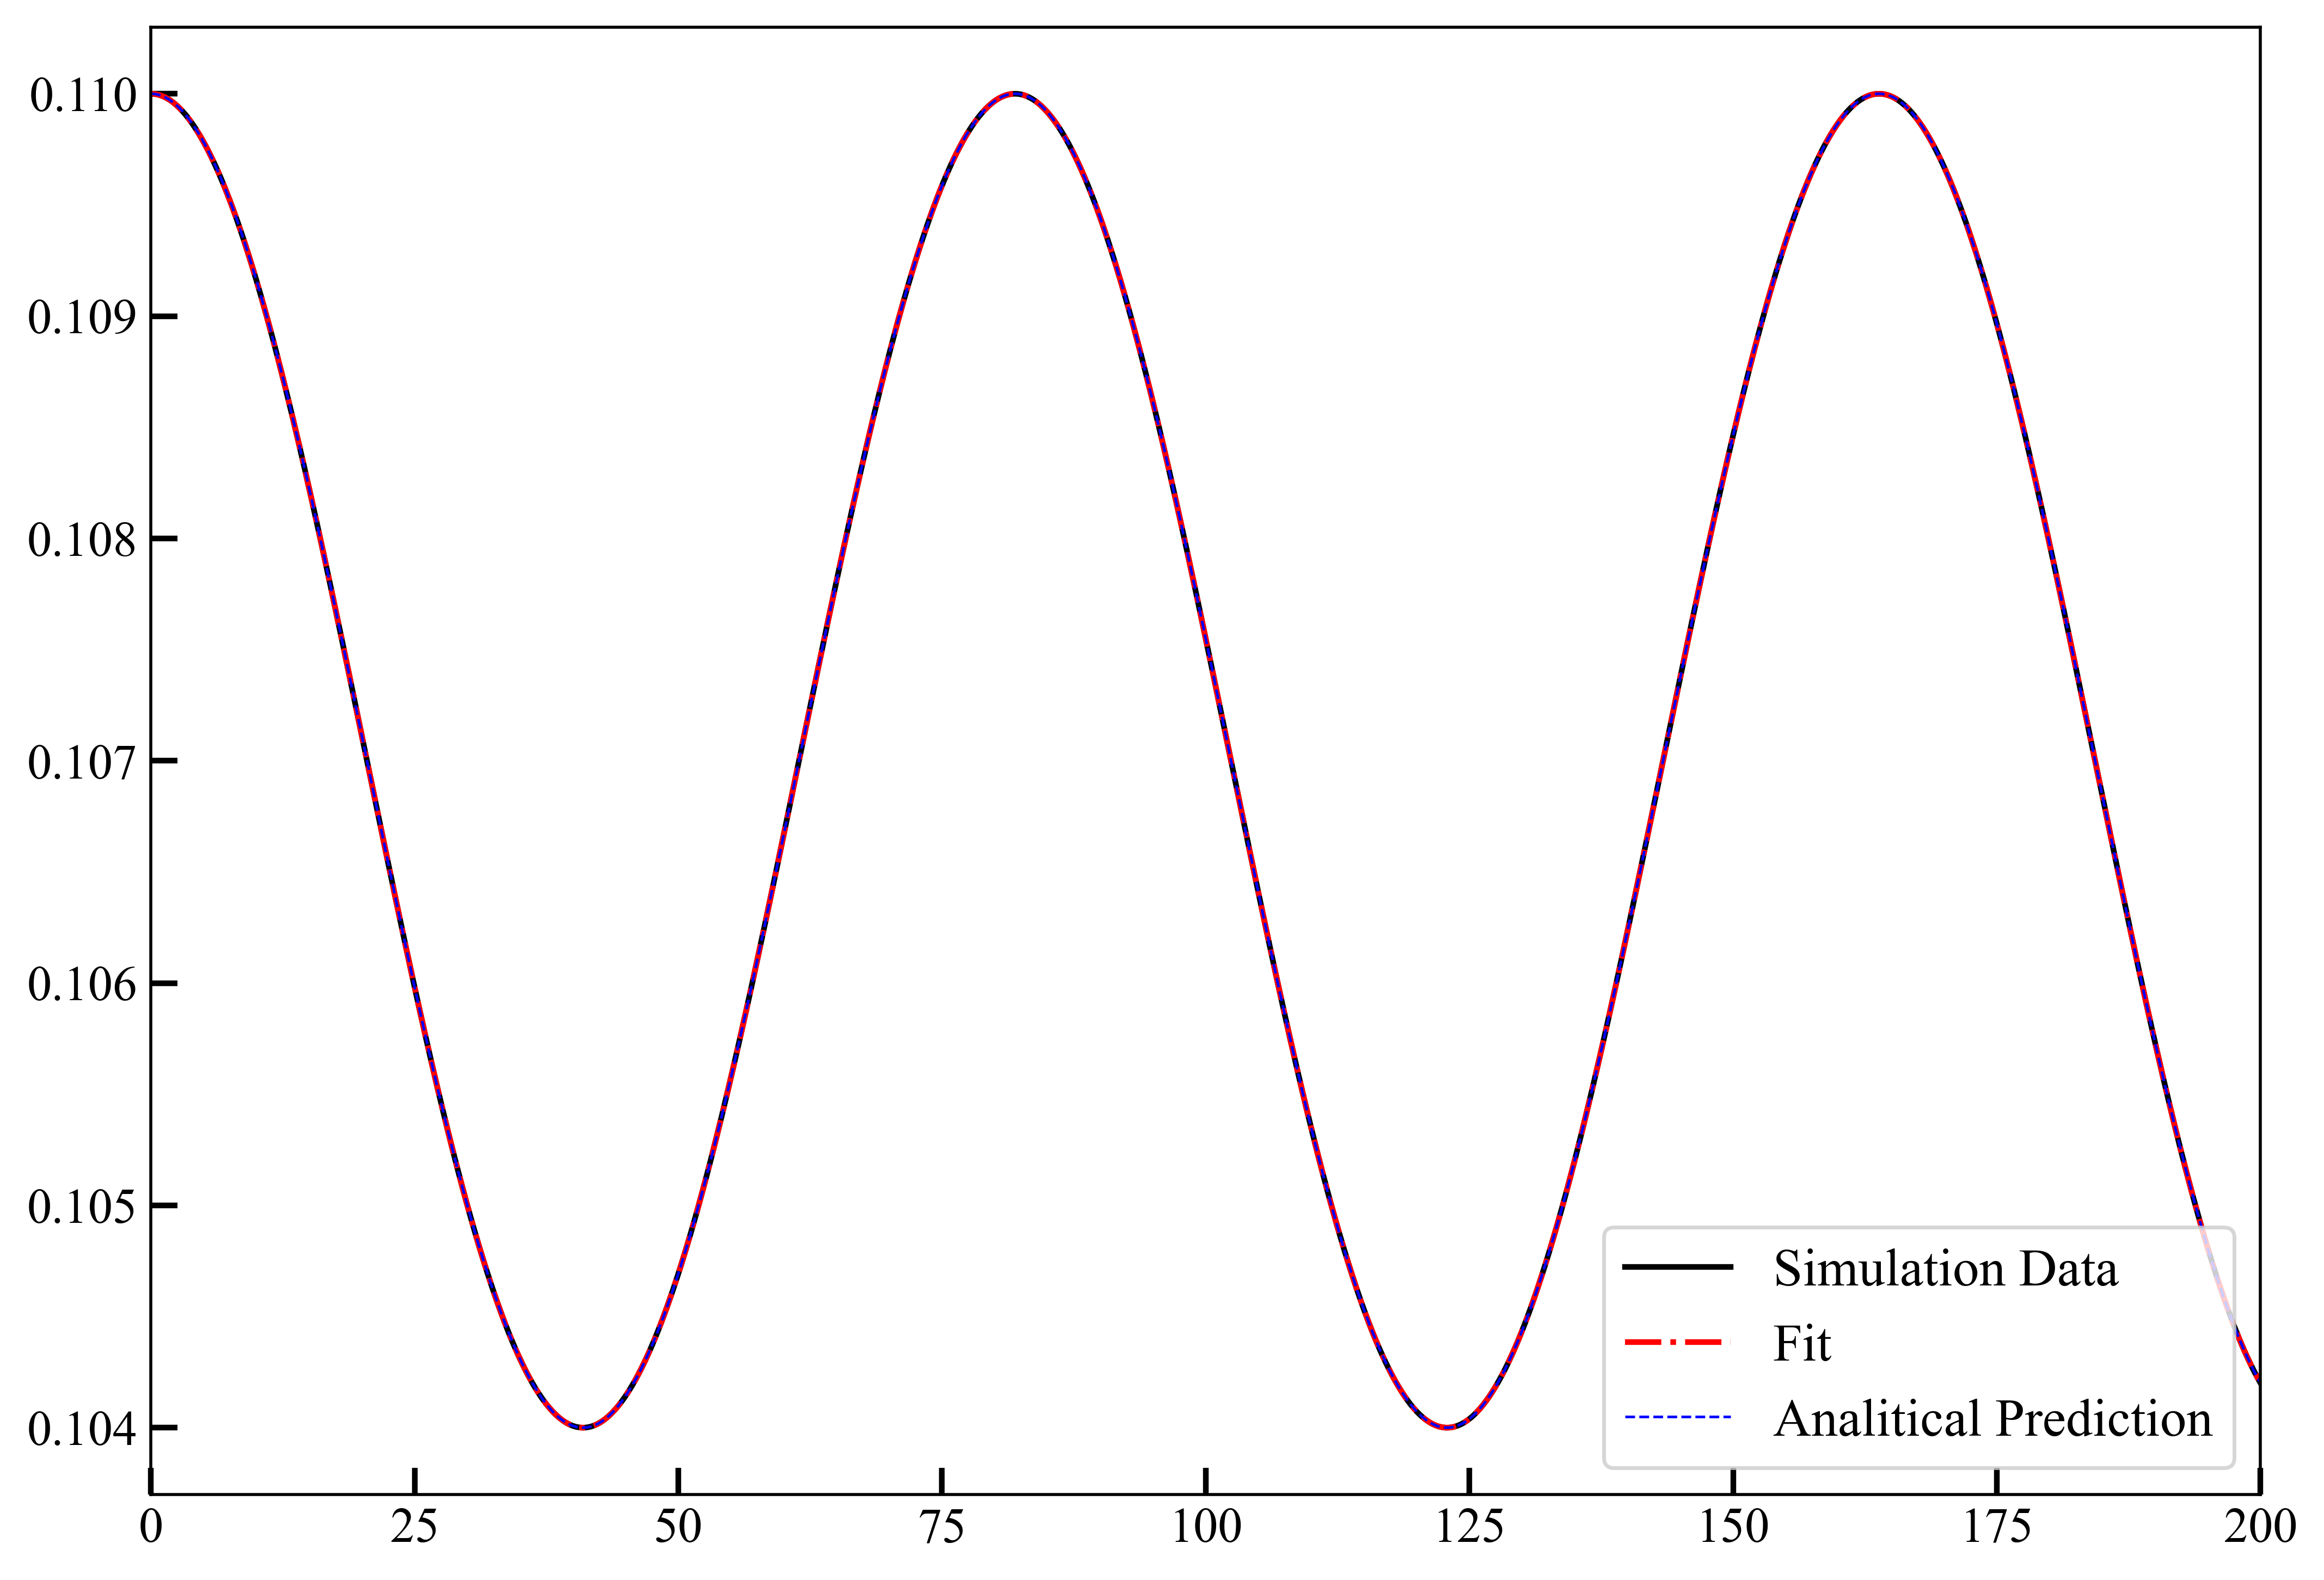

In [60]:
plt.figure(dpi=500, figsize=(10,7))
plt.plot(t,r[:,0], label='Simulation Data', color='black')
plt.plot(t, func(t, *popt), ls= '-.', label='Fit', color= 'red')
plt.plot(t, func(t, omega_ana, popt[1], popt[2], popt[3]),ls='dashed', color= 'blue', label='Analitical Prediction', lw= .7)
plt.xlim([0,200])
plt.legend()
plt.savefig('a).png')